In [1]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '10' 

In [2]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#[ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
results = [1]*35+[0]*14 

In [4]:
# DataFrame
data = [length,weight,results]
df = pd.DataFrame(data)
df = df.T
df

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [7]:
datas = df.iloc[:,0:2]
datas

results = df.iloc[:,2]
results

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
Name: 2, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
# random_state = 42   훈련세트, 테스트세트가 할 때마다 섞이지 않도록 해줌
# stratify :  설정데이터를 가지고 랜덤으로 데이터를 섞어줌
train_input,test_input, train_target, test_target = train_test_split(datas, results, stratify=results)
train_input

,0,1
30,38.5,920.0
14,32.0,600.0
21,34.0,685.0
4,29.0,430.0
5,29.7,450.0
43,12.0,9.8
36,10.5,7.5
2,26.5,340.0
16,33.0,700.0
28,36.0,850.0


In [16]:
## 머신러닝 구현
# 1. 데이터 전처리 - Nan, 0, 타입, 표준화작업, 훈련세트, 테스트세트 구성
# 2. 데이터 학습시키기 
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)
# 3. 데이터 예측하기
predict = clf.predict(test_input)
predict

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.])

In [17]:
# 4. 정확도 측정
score = clf.score(test_input,test_target)
print('정답률 :',score)

정답률 : 1.0


In [26]:
# 25, 150의 데이터는 knn판별할 때 이웃하는 데이터는 indexes
distance,indexes = clf.kneighbors([[25,150]])
indexes

array([[11, 35, 17, 21, 14]], dtype=int64)

In [27]:
train_input.iloc[indexes[0],0]

0     25.4
48    15.0
45    12.4
44    12.2
41    11.8
Name: 0, dtype: float64

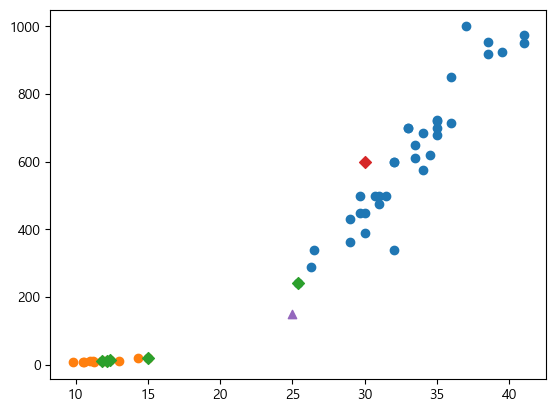

In [29]:
# 25,125의 고기를 판별
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0], train_input.iloc[indexes[0],1], marker='D')
plt.scatter(30,600, marker='D')
plt.scatter(25,150, marker='^')
# plt.xticks([0,1000])

In [21]:
predict = clf.predict([[25,125]])
predict

array([0.])

In [22]:
predict = clf.predict([[30,600]])
predict

array([1.])

#### 표준점수 : 훈련데이터 - 평균 / 표준편차

In [36]:
# 1) 판다스로 값 구하기
train_input[0].mean()
train_input[0].std()

10.273860729332196

In [35]:
# 2) numpy로 값 구하기

# type(train_input)

mean = np.mean(train_input, axis=0)
std = np.std(train_input,axis=0)
std

0     10.130163
1    328.424800
dtype: float64

In [37]:
# train_input, test_input
# 표준점수
train_scaled = (train_input - mean) / std
# test_scaled = (test_input - mean) / std

In [42]:
# 1개의 새로운 데이터도 계산한 값으로 변경해 주어야 함
new = ([25,150] - mean) /std
new

0   -0.219641
1   -0.945405
dtype: float64

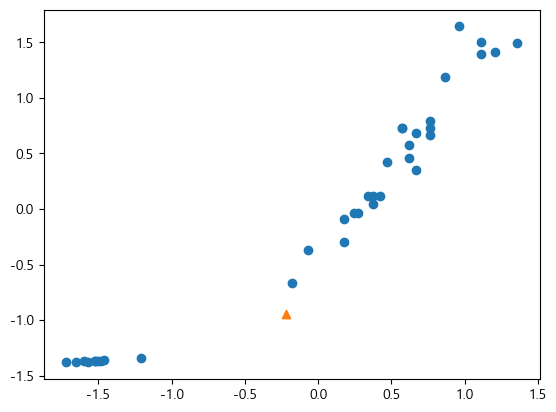

In [44]:
plt.scatter(train_scaled.iloc[:,0], train_scaled.iloc[:,1])
plt.scatter(new[0],new[1], marker='^')

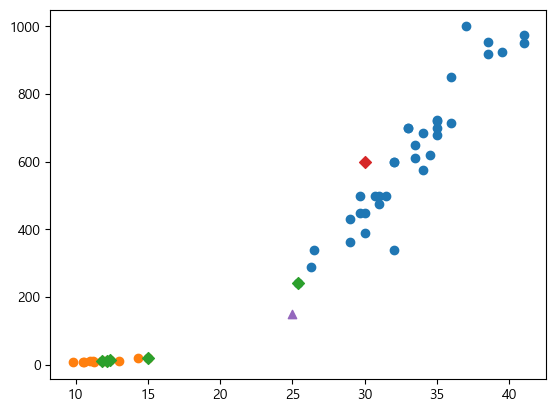

In [39]:
# 데이터 값으로 그린 그래프와 비교
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0], train_input.iloc[indexes[0],1], marker='D')
plt.scatter(30,600, marker='D')
plt.scatter(25,150, marker='^')
# plt.xticks([0,1000])

In [45]:
clf.fit(train_scaled, train_target)

KNeighborsClassifier()

In [47]:
test_scaled = (test_input - mean) / std

In [50]:
score = clf.score(test_scaled, test_target)
print("정답률 : ", score)

정답률 :  1.0


In [51]:
predict = clf.predict([new])
print("예측 값 :",predict)

예측 값 : [1.]


In [52]:
# knn 예측에 사용한 데이터
distances, indexes = clf.kneighbors([new])
indexes

array([[11,  7, 27,  3,  4]], dtype=int64)

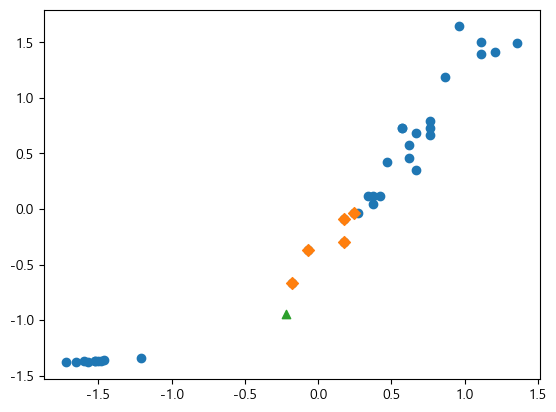

In [54]:
# 데이터 값으로 그린 그래프와 비교
plt.scatter(train_scaled.iloc[:,0], train_scaled.iloc[:,1])
plt.scatter(train_scaled.iloc[indexes[0],0], train_scaled.iloc[indexes[0],1], marker='D')
plt.scatter(new[0], new[1], marker='^')